In [109]:
import pickle
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r"E:\aicte\adult 3.csv")

In [3]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
data.tail(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
data.shape

(48842, 15)

In [6]:
#null values
data.isna().sum() #mean mdeian mode arbitrary

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [8]:
data.workclass.replace({'?':'Others'},inplace=True)
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [9]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [10]:
data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [11]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [12]:
print(data.relationship.value_counts())

relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64


In [39]:
print(data.gender.value_counts())

gender
Male      32629
Female    16182
Name: count, dtype: int64


In [41]:
data.shape

(48811, 15)

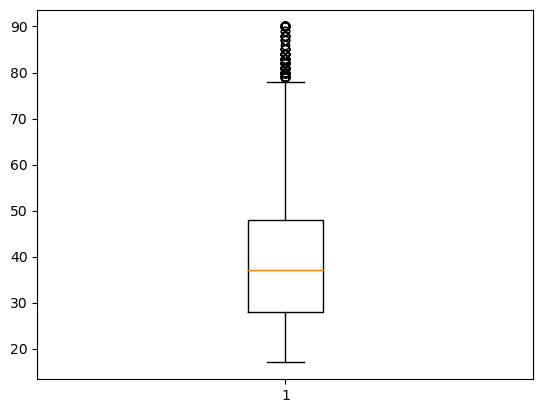

In [43]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

In [45]:
data=data[(data['age']<=75)&(data['age']>=17)]

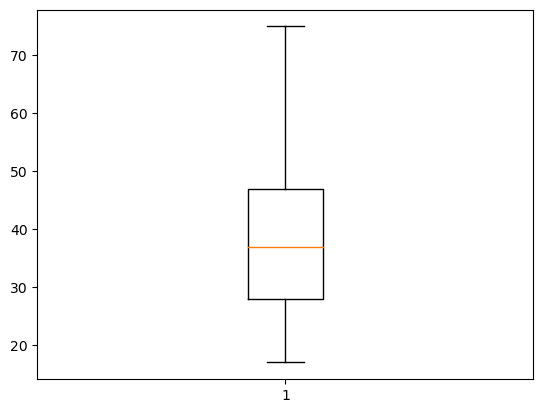

In [47]:
plt.boxplot(data['age'])
plt.show()

In [49]:
data.shape

(48438, 15)

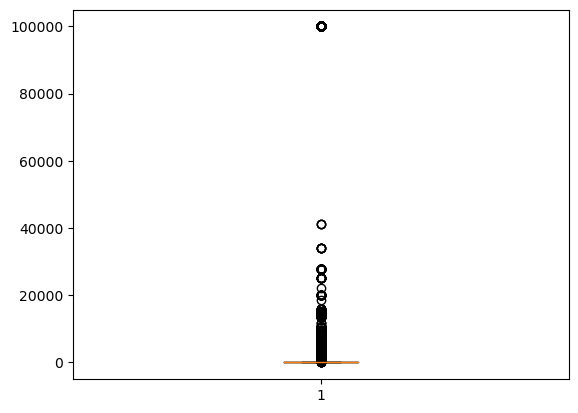

In [54]:
plt.boxplot(data['capital-gain'])
plt.show()

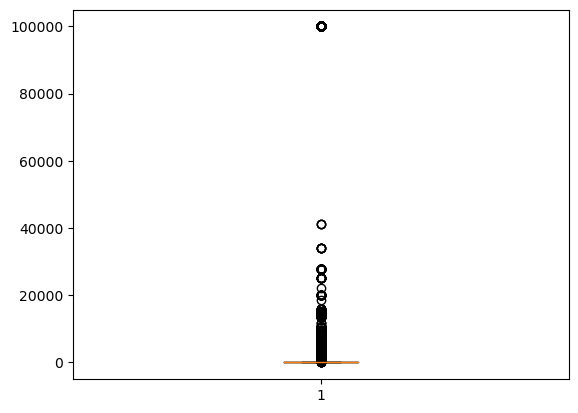

In [56]:
plt.boxplot(data['capital-gain'])
plt.show()

In [58]:
data.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


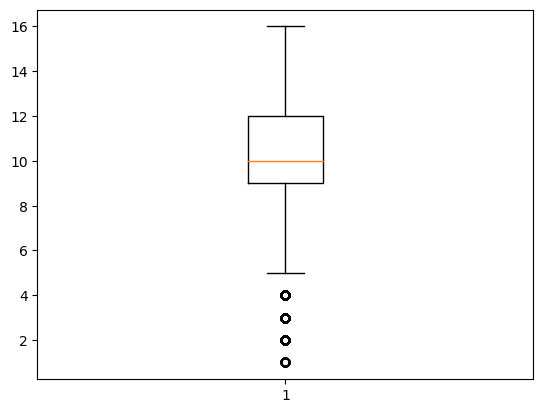

In [62]:
plt.boxplot(data['educational-num'])
plt.show()

In [64]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

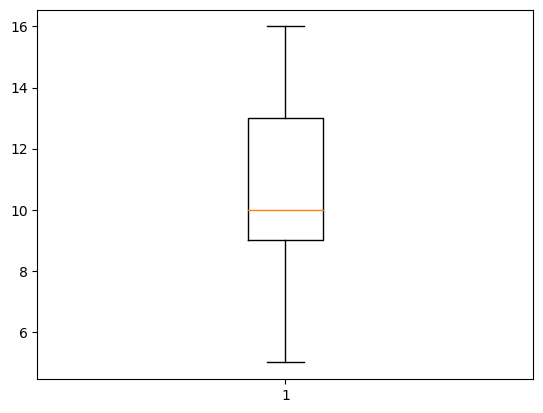

In [66]:
plt.boxplot(data['educational-num'])
plt.show()

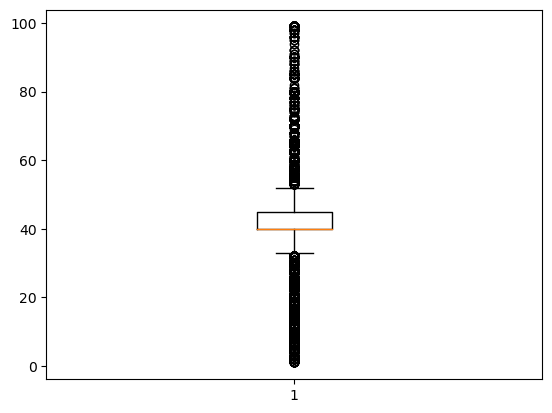

In [68]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [70]:
data.shape

(46720, 15)

In [72]:
data=data.drop(columns=['education']) #redundant features removal

In [74]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [76]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
data['workclass']=encoder.fit_transform(data['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
data['marital-status']=encoder.fit_transform(data['marital-status'])   #3 categories 0, 1, 2
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])      #5 categories  0, 1, 2, 3, 4
data['race']=encoder.fit_transform(data['race'])  
data['gender']=encoder.fit_transform(data['gender'])    #2 catogories     0, 1
data['native-country']=encoder.fit_transform(data['native-country'])

In [78]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [80]:
x=data.drop(columns=['income'])
y=data['income']
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,8,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [82]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression Accuracy: 0.8149
              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      7010
        >50K       0.69      0.46      0.55      2334

    accuracy                           0.81      9344
   macro avg       0.77      0.70      0.72      9344
weighted avg       0.80      0.81      0.80      9344

RandomForest Accuracy: 0.8510
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7010
        >50K       0.74      0.62      0.67      2334

    accuracy                           0.85      9344
   macro avg       0.81      0.77      0.79      9344
weighted avg       0.85      0.85      0.85      9344

KNN Accuracy: 0.8245
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      7010
        >50K       0.67      0.60      0.63      2334

    accuracy                           0.82      9344
   macro avg       0.77      0.75      0.

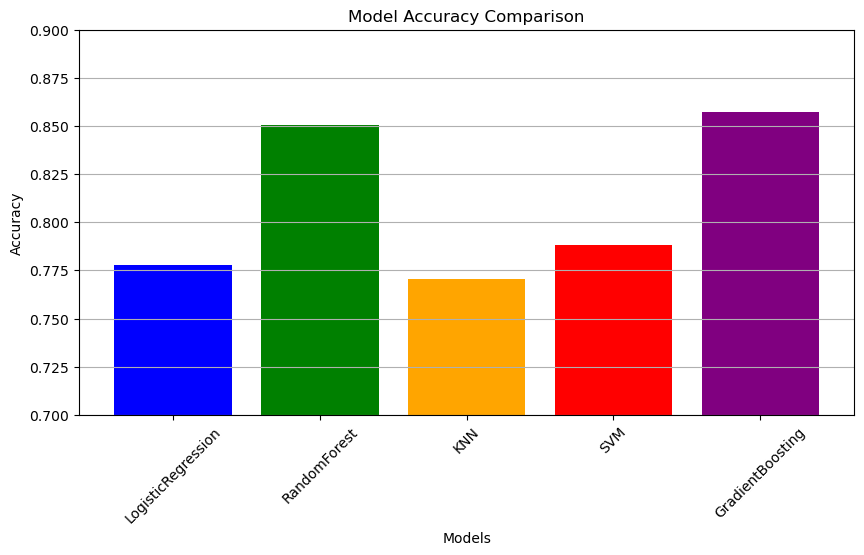

In [94]:
# import matplotlib.pyplot as plt
# plt.bar(results.keys(), results.values(), color='skyblue')
# plt.ylabel('Accuracy Score')
# plt.title('Model Comparison')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.show()



plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0.7, 0.9)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [96]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


✅ Best model: GradientBoosting with accuracy 0.8571
✅ Saved best model as best_model.pkl


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


LogisticRegression: 0.7777
RandomForest: 0.8493
KNN: 0.7704
SVM: 0.7884
GradientBoosting: 0.8571

✅ Best model: GradientBoosting with accuracy 0.8571
✅ Saved best model as best_model.pkl


In [111]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Loading model
model = joblib.load("best_model.pkl")

# Mapping features values as we have encoded these values while model training
education_map = {
    "HS-grad":0, "Some-college":1, "Bachelors":2, "Masters":3,
    "Assoc-voc":4, "11th":5, "Assoc-acdm":6, "10th":7, "7th-8th":8,
    "Prof-school":9, "9th":10, "12th":11, "Doctorate":12
}

workclass_list = ["Private","Self-emp-not-inc","Local-gov","State-gov","Federal-gov"]
marital_list = ["Married-civ-spouse","Divorced","Never-married","Separated","Widowed"]
occupation_list = ["Tech-support","Craft-repair","Other-service","Sales",
                 "Exec-managerial","Prof-specialty","Handlers-cleaners",
                 "Machine-op-inspct","Adm-clerical","Farming-fishing",
                 "Transport-moving","Priv-house-serv","Protective-serv","Armed-Forces"]
relationship_list = ["Husband","Wife","Not-in-family","Other-relative"]
race_list = ["White","Black","Asian-Pac-Islander","Amer-Indian-Eskimo","Other"]
country_list = ["United-States","Mexico","Philippines","Germany","Canada"]

# Encoders
workclass_enc = LabelEncoder().fit(workclass_list)
marital_enc = LabelEncoder().fit(marital_list)
occupation_enc = LabelEncoder().fit(occupation_list)
relationship_enc = LabelEncoder().fit(relationship_list)
race_enc = LabelEncoder().fit(race_list)
country_enc = LabelEncoder().fit(country_list)


st.set_page_config(page_title="Income Predictor", page_icon="💰", layout="centered")
st.title("💰 Income Predictor")
st.write("Predict whether annual income exceeds $50K")

# Sidebar
with st.sidebar:
    st.header("Personal Details")
    age = st.slider("Age", 18, 65, 30)
    workclass = st.selectbox("Work Class", workclass_list)
    education = st.selectbox("Education Level", list(education_map.keys()))
    marital = st.selectbox("Marital Status", marital_list)
    occupation = st.selectbox("Occupation", occupation_list)
    relationship = st.selectbox("Relationship", relationship_list)
    race = st.selectbox("Race", race_list)
    gender = st.selectbox("Gender", ["Male","Female"])
    capital_gain = st.number_input("Capital Gain", 0, 100000, 0)
    capital_loss = st.number_input("Capital Loss", 0, 10000, 0)
    hours = st.slider("Hours per Week", 1, 100, 40)
    country = st.selectbox("Native Country", country_list)
    fnlwgt = st.number_input("Final Weight (fnlwgt)", 10000, 1000000, 200000)

# Main Screen
st.subheader("Your Input Summary")
input_summary = pd.DataFrame({
    "Feature": ["Age", "Work Class", "Education", "Marital Status", "Occupation",
               "Relationship", "Race", "Gender", "Capital Gain", "Capital Loss",
               "Hours/Week", "Country", "Final Weight"],
    "Value": [age, workclass, education, marital, occupation,
             relationship, race, gender, capital_gain, capital_loss,
             hours, country, fnlwgt]
})
st.table(input_summary)

# Prediction
if st.button("Predict Income"):
    input_data = {
        'age': age,
        'workclass': workclass_enc.transform([workclass])[0],
        'fnlwgt': fnlwgt,
        'education': education_map[education],
        'marital-status': marital_enc.transform([marital])[0],
        'occupation': occupation_enc.transform([occupation])[0],
        'relationship': relationship_enc.transform([relationship])[0],
        'race': race_enc.transform([race])[0],
        'gender': 1 if gender == "Male" else 0,
        'capital-gain': capital_gain,
        'capital-loss': capital_loss,
        'hours-per-week': hours,
        'native-country': country_enc.transform([country])[0]
    }
    
    prediction = model.predict(pd.DataFrame([input_data]))
    proba = model.predict_proba(pd.DataFrame([input_data]))[0]
    
    st.subheader("Prediction Result")
    if prediction[0] == ">50K":
        st.success(f"✅ High Earner (>$50K) with {proba[1]*100:.1f}% confidence")
    else:
        st.info(f"💼 Moderate Earner (≤$50K) with {proba[0]*100:.1f}% confidence")

st.caption("Model accuracy: ~86.7%")

Overwriting app.py


In [ ]:
%%time
!streamlit run app.py   ##First you have to download the label encoder datasets in csv file format, then you have to use this command "streamlit run app.py" in the command prompt and press enter then your page will be ready to open and you can then insert that label encoder dataset csv file into that web application and select the filter to see your predicted salary
                        ##Why do we use label encoder dataset csv? because This means your model is expecting numerical or encoded features like age, workclass, fnlwgt, educational-num, marital-status, occupation, ...38, 2, 89814, 9, 2, 4, ..., but the batch CSV (adult 3.csv) contains raw string data like:  'Private' in workclass '11th', 'HS-grad', etc. in education 'Never-married' in marital-status
                        ##So the label encoder cvs file format is looks like this at lastage "C:\Users\ASUS\Downloads\cleaned_adult.csv",this is the path/directory not the csv file format.
                        ##So lastly you have to complete the step by step process and get your predicted salary......!!